# NB and Logistic Regression Project 

Welcome to NB and Logistic Regression Project! Go ahead and follow the directions below.

Tasks:

EDA and Basic Data Preprocessing and Preparation [Marks:2]

Train Model using different variations of NB [Marks:2+1]

Compare time and accuracy of different NB algorithms [Marks:0.5]

Train Model with Logistic Regression with different solver and penalty [Marks:2+1]

Compare time and accuracy of different Logistic Regression algorithms [Marks:0.5]

Plot confusion Matrix for the final model selected [Marks:1]



Above tasks are mentioned in the notebook, The notebook has empty
code cells. Fill the empty code cells with appropriate python code.
Convert the notebook to HTML format and upload on Canvas. Submit ONLY
HTML format of the notebook.

**Build a classification model which will recognise the activities through the mobile sensor like walking, walking_upstairs  ,walking_downstairs ,sitting  ,standing,lying.The topic Human Activity recognition is in research and has its own advantages like anomaly detection, for healthy diet maintenance fitness bands are used , measuring stress level ,for monitoring employees ,for heartbeat pulse rate etc. In this project we are going to focus on  the dataset which was carried out through experiments with a group of 30 volunteers wearing a smartphone.The experiments have been video-recorded to label the data manually.The  main motto is to use the dataset and work with the libraries like scikit learn and machine learning related libraries and algorithms while training.**

# <font color='red'>Download and submit only HTML file</font>

# Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [14]:
import pandas as pd
import seaborn as sns

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import statsmodels as sm

# EDA and Basic Data Preprocessing and Preparation [Marks:2]
**If trying auto EDA do it in a different notebook and only highlight important, interesting or unusual pattern that you noticed in the data**

<font color='red'>Give justification for your choices and techniques used for every step</font>

In [5]:
df = pd.read_csv('NISHITH - human_activity.csv')
df.head()           #First five rows

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [ ]:
                            #Data Analysis
print("*********************************************")
df.info()         #Gives info on each and every column and their data types stored
print("*********************************************")

In [9]:
df.shape          #number of rows and columns

(7352, 563)

In [10]:
df.describe()     #Gives count, mean, stdev, min value, max value, common percentiles

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [ ]:
df.describe().shape

In [6]:
#Dataprep Part

from dataprep.eda import plot
from dataprep.eda import create_report
# plot(df)
report = create_report(df)

  0%|          | 0/727963 [00:00<?, ?it/s]

/home/nishith/.local/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
E-1019 (DUPLICATE_FACTORS): FactorRange must specify a unique list of categorical factors for an axis: duplicate factors found: 'tGravityAcc-m...)-X', 'tGravityAcc-m...)-Y', 'tGravityAcc-m...)-Z', 'tGravityAcc-e...)-X', 'tGravityAcc-e...)-Y', 'tGravityAcc-e...)-Z', 'tBodyAccJerk-...)-X', 'tBodyAccJerk-...)-Y', 'tBodyAccJerk-...)-Z', 'tBodyGyroJerk...)-X', 'tBodyGyroJerk...)-Y', 'tBodyGyroJerk...)-Z', 'tBodyGyroJerk...a()', 'tBodyAccMag-e...y()', 'tGravityAccMa...n()', 'tGravityAccMa...d()', 'tGravityAccMa...y()', 'tBodyAccJerkM...n()', 'tBodyAccJerkM...d()', 'tBodyAccJerkM...y()', 'tBodyGyroMag-...y()', 'tBodyGyroJerk...n()', 'tBodyGyroJerk...d()', 'tBodyGyroJerk...y()', 'fBodyAcc-band...,16', 'fBodyAcc-band...,24', 'fBodyAcc-band...,32', 'fBodyAcc-band...,48', 'fBodyAcc-band...,64', 'fBodyAcc-band...8.1', 'fBodyA

In [7]:
report.save('report_01.html')

Report has been saved to report_01.html!


## Null/Outlier Treatment

In [7]:
df.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

We see that there are no Null values, we proceed with Finding outliers

In [17]:
def boxPlot(df,feature):
        df.boxplot(column = [feature])
        plt.grid(False)
        plt.show()

# outliers = []
# # @brief returns a list of indices of all outliers
# # @param dataframe and the feature
# def detect_outliers_iqr(df):
#     df = sorted(df)
#     q1 = np.percentile(df, 25)
#     q3 = np.percentile(df, 75)
#     # print(q1, q3)
#     IQR = q3-q1
#     lwr_bound = q1-(1.5*IQR)
#     upr_bound = q3+(1.5*IQR)
#     # print(lwr_bound, upr_bound)
#     for i in df: 
#         if (i<lwr_bound or i>upr_bound):
#             outliers.append(i)
#     return outliers

# @brief returns a list of indices of all outliers
# @param dataframe and the feature
def outliers(df,feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1 
    lowerBound = Q1 - 1.5 * IQR
    upperBound = Q3 + 1.5 * IQR

    lst = df.index[ (df[feature] < lowerBound ) | (df[feature] > upperBound) ]
    return lst 

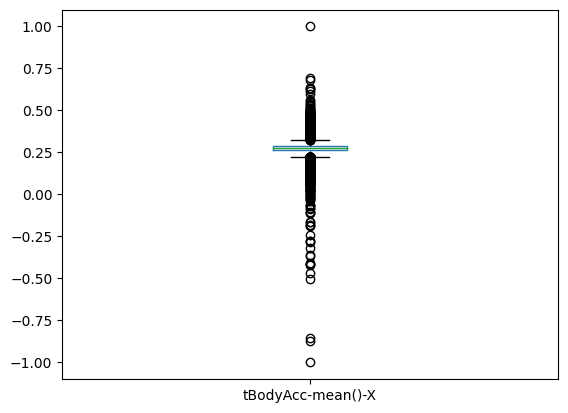

In [13]:
#Checking if the function works
boxPlot(df,"tBodyAcc-mean()-X")

In [ ]:
# @brief Creating an index list for all columns


## Remove non-Important Features

No features are removed since all features in the dataset are combinations of human movements in x,y,z directions, so nothing can be irrelevant in training our model

## Split Predictor and Target Varaibles

## Split Training and Testing Data Set

## Standardize the Variables

# Train Model using different variations of NB [Marks:2+1]
**Breifly describe & Justify why one of the variant performed better compared to others**

# Compare time and accuracy of different NB algos [Marks:0.5]

# Train Model with Logistic Regression with different solver and penalty [Marks:2+1]
**Justify why one of the solver or penalty performed better compared to others**

# Compare time and accuracy of different Logistic Regression algos [Marks:0.5]

# Plot confusion Matrix for the final model selected [Marks:1]